# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Laura Dooley 
## GitHub RepO: https://github.com/Ldooley32/article-summarizer-ldooley

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1
 Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [53]:
import requests
import json
import spacy
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
from IPython.display import display, Markdown
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

url = 'https://api.lyrics.ovh/v1/Aretha Franklin/Respect'

result = json.loads(requests.get(url).text)

# Define the folder and file paths
file_name = 'Respect.json'


# Write the result to the JSON file
with open(file_name, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=4)

print(f"Lyrics saved to {file_name}")

Lyrics saved to Respect.json


## Question 2
 Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [54]:
# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to pipeline
nlp.add_pipe("spacytextblob")

# Extract only the lyrics text from the API response
lyrics = result.get('lyrics', '')

# Process lyrics with spaCy 
doc = nlp(lyrics)

# perform sentiment analysis for a polarity score
polarity = doc._.blob.polarity  

display(Markdown(f"*Respect* lyrics have a Polarity Score of {polarity}"))

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(lyrics, 'html.parser')

# Extract the text from the HTML
lyrics_text = soup.get_text()

# Process the text with SpaCy to create a Doc object
doc = nlp(lyrics_text)

# Count the number of sentences
num_sentences = len(list(doc.sents))

display(Markdown(f"*Respect* lyrics contains {num_sentences} sentences"))


*Respect* lyrics have a Polarity Score of -0.21541666666666667

*Respect* lyrics contains 21 sentences

## Question 3
 Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [55]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Parse the HTML content using BeautifulSoup (if the lyrics are in HTML format)
soup = BeautifulSoup(lyrics, 'html.parser')

# Extract the plain text from the HTML
lyrics_text = soup.get_text()

# Process the text with spaCy
doc = nlp(lyrics_text)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Display the top 5 most frequent tokens
display(Markdown(f"Top 5 Most Frequent Tokens in *Respect* lyrics:"))
for token, freq in most_common_tokens:
    display(Markdown(f"Token: '{token}', Frequency: {freq}"))


Top 5 Most Frequent Tokens in *Respect* lyrics:

Token: 'little', Frequency: 27

Token: 'bit', Frequency: 22

Token: 'home', Frequency: 9

Token: 'sock', Frequency: 8

Token: 'respect', Frequency: 7

## Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [56]:

nlp = spacy.load("en_core_web_sm")

# Example article text (replace with your actual article text)
lyrics = result.get('lyrics', '')

# Process the article text using the trained spaCy pipeline
doc = nlp(lyrics)

# Filter tokens: remove punctuation, stopwords, and whitespace, keeping lemmatized forms
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Display the top 5 most frequent lemmas
display(Markdown(f"Top 5 Most Frequent Lemmas in *Respect* lyrics:"))
for lemma, freq in most_common_lemmas:
    display(Markdown(f"Lemma: '{lemma}', Frequency: {freq}"))


Top 5 Most Frequent Lemmas in *Respect* lyrics:

Lemma: 'little', Frequency: 27

Lemma: 'bit', Frequency: 22

Lemma: 'home', Frequency: 9

Lemma: 'sock', Frequency: 8

Lemma: 'respect', Frequency: 7

## Question 5
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

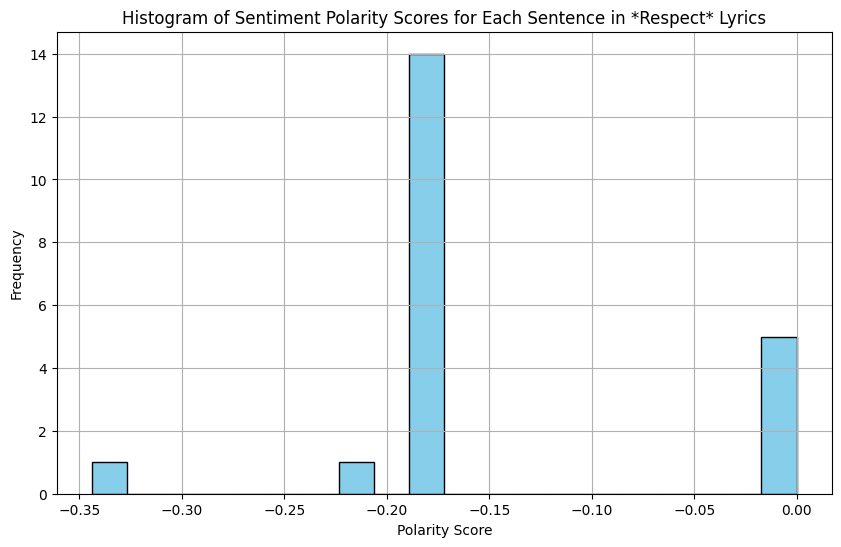

In [57]:
# Load spaCy model and add spacytextblob to the pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Extract lyrics text from API response
lyrics = result.get('lyrics', '')

# Process the lyrics with spaCy
doc = nlp(lyrics)

# List to hold the polarity score of each sentence
sentence_polarities = []

# Loop through each sentence in the document
for sent in doc.sents:
    # Get the polarity score of each sentence using spacytextblob
    sentence_polarities_tokens = sent._.blob.polarity
    sentence_polarities.append(sentence_polarities_tokens)

# Plot histogram of sentence polarities
plt.figure(figsize=(10, 6))
plt.hist(sentence_polarities, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentiment Polarity Scores for Each Sentence in *Respect* Lyrics")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Question 6
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

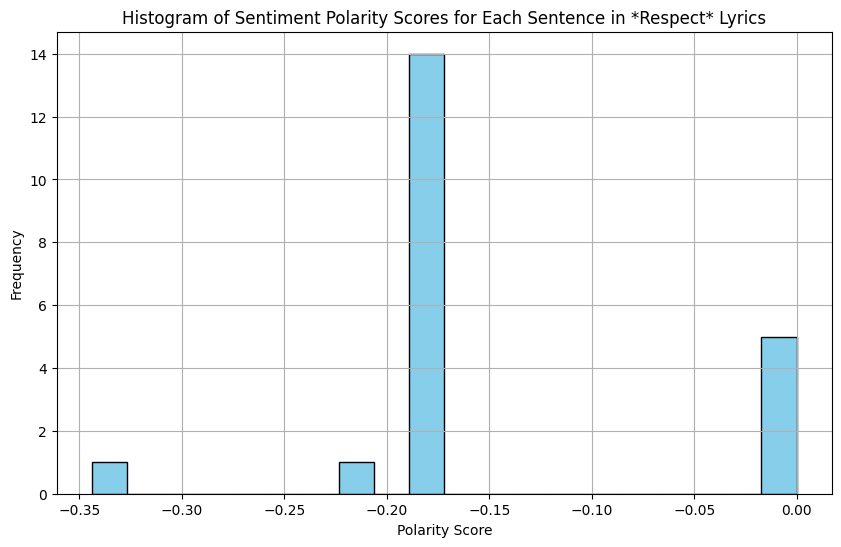

In [58]:
# Load spaCy model and add spacytextblob to pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Extract lyrics text from API response
lyrics = result.get('lyrics', '')

# Process the lyrics with spaCy
doc = nlp(lyrics)

# List to hold the polarity score of each sentence
sentence_polarities = []

# Loop through each sentence in the document
for sent in doc.sents:
    # Filter lemmas for the sentence (remove stopwords, punctuation, and whitespace)
    filtered_lemmas = [
        token.lemma_.lower() for token in sent
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    
    # Calculate polarity based on filtered lemmas (using spaCyTextBlob)
    sentence_polarities_lemmas = sent._.blob.polarity
    sentence_polarities.append(sentence_polarities_lemmas)

# Plot histogram of sentence polarities
plt.figure(figsize=(10, 6))
plt.hist(sentence_polarities, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentiment Polarity Scores for Each Sentence in *Respect* Lyrics")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



## Question 7 
 Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): -0.2
* Cutoff Score (lemmas): -0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Question 8 
 Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [59]:
# Example: Compute cutoff if not already done
sentence_polarities_tokens = [sent._.blob.polarity for sent in doc.sents]
cutoff_tokens = sorted(sentence_polarities_tokens)[len(sentence_polarities_tokens) // 2]

# Print cutoff for confirmation
print(f"Cutoff token score : {cutoff_tokens}")

# Initialize an empty list to hold sentences above the cutoff score
summary_sentences = []

# Loop through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score based on tokens
    polarity_score = sent._.blob.polarity

    # Add the sentence to the summary if its polarity score is above the cutoff
    if polarity_score > cutoff_tokens:
        summary_sentences.append(sent.text.strip())

# Generate the summary text by joining the sentences with spaces
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Generated Summary Token:")
print(summary_text)


Cutoff token score : -0.1875
Generated Summary Token:
What you want
Baby, I got it
What you need
Do you know I got it? I'm about to give you all of my money And all I'm askin' in return, honey

Is to give me my propers

When you get home (just a, just a, just a, just a) Yeah baby (just a, just a, just a, just a) So is my money

All I want you to do for me

Is give it to me when you get home (re, re, re ,re)


## Question 9
Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [60]:
# Calculate the polarity score of the generated summary
summary_doc = nlp(summary_text)  # Process the summary text with spaCy
summary_polarity = summary_doc._.blob.polarity  # Polarity score of the summary

# Count the number of sentences in the summarized article
num_summary_sentences = len(list(summary_doc.sents))

# Print results
print(f"Polarity Score of Summary: {summary_polarity}")
print(f"Number of Sentences in Summary: {num_summary_sentences}")


Polarity Score of Summary: 0.0
Number of Sentences in Summary: 5


## Question 10
Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [61]:
# Step 1: Calculate lemma polarity scores and determine cutoff
sentence_polarities_lemmas = [sent._.blob.polarity for sent in doc.sents]
cutoff_lemmas = sorted(sentence_polarities_lemmas)[len(sentence_polarities_lemmas) // 2]

# Print cutoff score for confirmation
print(f"Cutoff Score lemmas: {cutoff_lemmas}")

# Step 2: Create a summary based on lemma polarity scores
summary_sentences_lemmas = []

# Loop through each sentence in the article
for sent in doc.sents:
    polarity_score = sent._.blob.polarity

    # Add sentence if polarity score is above cutoff
    if polarity_score > cutoff_lemmas:
        summary_sentences_lemmas.append(sent.text.strip())

# Generate summary text
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary
print("Generated Summary Lemma Scores:")
print(summary_text_lemmas)


Cutoff Score lemmas: -0.1875
Generated Summary Lemma Scores:
What you want
Baby, I got it
What you need
Do you know I got it? I'm about to give you all of my money And all I'm askin' in return, honey

Is to give me my propers

When you get home (just a, just a, just a, just a) Yeah baby (just a, just a, just a, just a) So is my money

All I want you to do for me

Is give it to me when you get home (re, re, re ,re)


## Question 11
 Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [62]:
# Step 1: Process the summary text with spaCy
summary_doc_lemmas = nlp(summary_text_lemmas)

# Step 2: Calculate the polarity score of the summary
summary_polarity_lemmas = summary_doc_lemmas._.blob.polarity

# Step 3: Count the number of sentences in the summarized article
num_summary_sentences_lemmas = len(list(summary_doc_lemmas.sents))

# Step 4: Print results
print(f"Polarity Score of Summary (Lemma Scores): {summary_polarity_lemmas}")
print(f"Number of Sentences in Summary (Lemma Scores): {num_summary_sentences_lemmas}")


Polarity Score of Summary (Lemma Scores): 0.0
Number of Sentences in Summary (Lemma Scores): 5


## Question 12
  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  
___
The original article had a token and lemma polarity score of -0.1875. The songs theme is of struggle and longing. The negative sentiment is reflective of the negative polarity score. The summary score is 0 indicating neutality. The summary has a more balanced sentiment. It contains phrases that are expressing positive and negative aspects resulting in a neutral score.

## Question 13
 Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?
___
Both summaries are the same. There is no difference producing the same emotional tone. 